In [2]:
# Import all necessary libraries
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

In [3]:
# Number of pairs feature/label.
N = 1000

In [4]:
# Input values (features)
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Noise.
w = np.random.randn(N, 1)

# True model.
y = x1 + x2

# Observable function.
y_noisy = y + w

In [5]:
# Closed-form solution.
X = np.block([x1, x2])

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

print('a1_opt', a_opt[0][0])
print('a2_opt', a_opt[1][0])
print('Joptimum', Joptimum)

a1_opt 1.0373518580863201
a2_opt 1.054902171742376
Joptimum 0.9809577522249409


In [6]:
class MyGD:
    
    alpha = 0.1
    maxEpochs = 0
    iteration = 0
    K = 0
    
    def __init__(self, alpha, maxEpochs, initialWeights):
        self.alpha = alpha
        self.maxEpochs = maxEpochs
        self.K = len(initialWeights)
        # Create empty structures.
        self.a_hist = np.zeros((self.K, self.maxEpochs))
        self.Jgd = np.zeros(self.maxEpochs)
        # Intialize the weights.
        self.a = np.array(initialWeights).reshape(self.K, 1)
        
    def getResults(self):
        return self.a, self.Jgd, self.a_hist, self.iteration
    
    def get_params(self, deep):
        return {'alpha' : self.alpha}
    
    def set_params(self, **params):
        self.alpha = params['alpha']
    
    def score(self, X, y_noisy):
        N = len(y_noisy)
        yhat = X.dot(self.a)
        return (1.0/N)*sum(np.power(y_noisy - yhat, 2)) 

    def fit(self, X, y_noisy):
        N = len(y_noisy)
        # Calculate the error for the initial weights.
        self.Jgd[0] = self.score(X, y_noisy)

        error = 1
        while(error > 0.001 and self.iteration < self.maxEpochs-1):

            # Hypothesis function.
            h = X.dot(self.a)

            # Calculate gradient vector.
            gradients = -(2.0/N)*X.T.dot(y_noisy - h)

            # Weight update rule.
            self.a = self.a - self.alpha*gradients

            # Store weight variation.
            self.a_hist[:, self.iteration+1] = self.a.reshape(self.K,)

            # Calculate and store actual error.
            self.Jgd[self.iteration+1] = self.score(X, y_noisy)
            
            # Error difference between actual and previous iteration.
            error = np.abs(self.Jgd[self.iteration]-self.Jgd[self.iteration+1])   

            self.iteration += 1

In [7]:
# Gradient-descent solution.
maxEpochs = 10000

initialWeights = [-20.0, -20.0]

alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

interations = []
scores = []
for i in range(0,len(alphas)):
    gd = MyGD(alphas[i], maxEpochs, initialWeights)
    gd.fit(X, y_noisy)
    scores.append(gd.score(X, y_noisy))
    interations.append(gd.iteration)

In [8]:
scores

[array([18.43867885]),
 array([1.23656777]),
 array([1.00549959]),
 array([0.98223409]),
 array([0.99864517])]

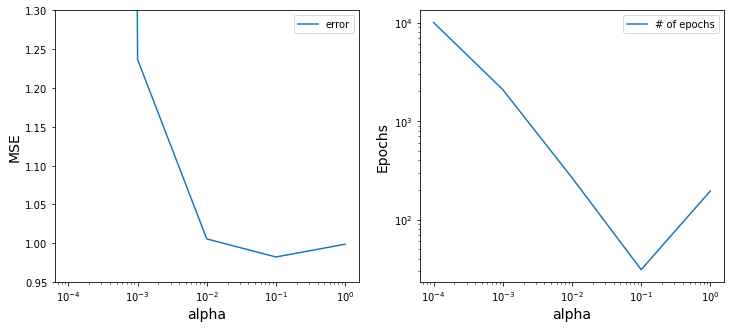

In [9]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax1.plot(alphas, scores, label='error')
ax1.set_xlabel('alpha', fontsize=14)
ax1.set_ylabel('MSE', fontsize=14)
ax1.legend()
ax1.set_ylim(0.95,1.3)
ax1.set_xscale('log')

ax2 = fig.add_subplot(122)
ax2.plot(alphas, interations, label='# of epochs')
ax2.set_xlabel('alpha', fontsize=14)
ax2.set_ylabel('Epochs', fontsize=14)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend()

plt.savefig("grid_search1.png", dpi=600)
plt.show()

In [10]:
# Gradient-descent solution.
maxEpochs = 10000

initialWeights = [-20.0, -20.0]

alphas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

interations = []
scores = []
for i in range(0,len(alphas)):
    gd = MyGD(alphas[i], maxEpochs, initialWeights)
    gd.fit(X, y_noisy)
    scores.append(gd.score(X, y_noisy))
    interations.append(gd.iteration)

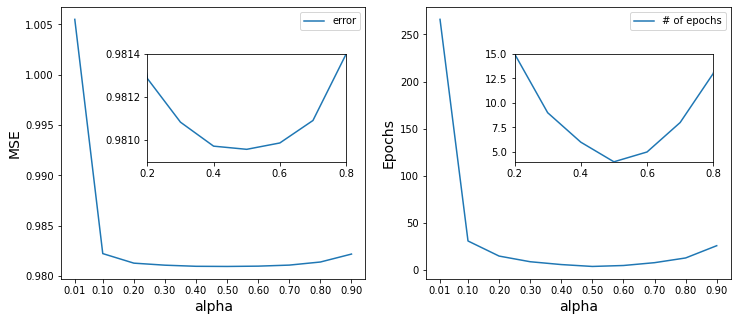

In [11]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax1.plot(alphas, scores, label='error')
ax1.set_xlabel('alpha', fontsize=14)
ax1.set_ylabel('MSE', fontsize=14)
ax1.set_xticks([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(alphas, interations, label='# of epochs')
ax2.set_xlabel('alpha', fontsize=14)
ax2.set_ylabel('Epochs', fontsize=14)
ax2.set_xticks([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax2.legend()

left, bottom, width, height = [0.225, 0.45, 0.23, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(alphas, scores)
ax3.set_xlim(0.2, 0.8)
ax3.set_ylim(0.9809, 0.9814)

left, bottom, width, height = [0.65, 0.45, 0.23, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.plot(alphas, interations)
ax4.set_xlim(0.2, 0.8)
ax4.set_ylim(4, 15)

plt.savefig("grid_search2.png", dpi=600)
plt.show()